In [ ]:
!pip install tnetwork

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import PatchCollection,LineCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, date2num

In [ ]:
cm.get_cmap("Set3")(2)

(0.7450980392156863, 0.7294117647058823, 0.8549019607843137, 1.0)

In [ ]:
import tnetwork as tn
import math
import numpy as np

In [ ]:
gg = tn.DynGraphIG()
gg.add_node_presence(0,(0,5))
gg.add_node_presence(1,(2,5))
gg.add_node_presence(2,(0,3))
gg.add_interaction(0,1,(2,3))

In [ ]:
def plot_longitudinal_pyplot(edges,nodes,coms=None,path=None,markers=None,to_datetime=False,width=800,height=200,sparse_coms=False):
    fig, ax = plt.subplots(1,figsize=(width/100,height/100),dpi=100)
    periods = []

    node2y = {n:i for i,n in enumerate(nodes)}
    # Loop over data points; create box from errors at each point
    x_column = "time"

    max_x = 0
    min_x = math.inf
    for n in nodes:
      for p in nodes[n].periods():
        print(p)
        start_x = p[0]
        end_x=p[1]

        slot_width = p[1]-p[0]
        if to_datetime:
            start_x=date2num(start_x)
            slot_width = date2num(edges[x_column][i]+slot_width)-start_x
        max_x=max(max_x,start_x+slot_width)
        min_x = min(min_x,start_x)
        #rect = Rectangle(( start_x,node2y[n]), width=slot_width, height=0.9,color="grey",edgecolor=None)
        #node_life= Line2D([start_x,p[1]],[node2y[n],node2y[n]],linewidth=5)
        periods.append([(start_x,node2y[n]),(end_x,node2y[n])])
    nodes_lifes = LineCollection(periods, linestyle="-",zorder=0,colors="navy",linewidths=1)
    #nodes_lifes = LineCollection(periods, linestyle=(0, (5, 1)),zorder=0,colors="lightgrey",linewidths=5)


  
    # Add collection to axes
    ax.add_collection(nodes_lifes)


    periods = []
    dots_x=[]
    dots_y=[]
    for e in edges:
      for p in edges[e]:
        print(p)
        u,v=e
        start_x=p[0]
        end_x=p[1]
        y=min(node2y[u],node2y[v])+abs(node2y[u]-node2y[v])*0.66
        if to_datetime:
            start_x=date2num(start_x)
            slot_width = date2num(edges[x_column][i]+slot_width)-start_x
        periods.append([(start_x,y),(end_x,y)])
        periods.append([(start_x,node2y[u]),(start_x,node2y[v])])
        dots_x+=[start_x,start_x]
        dots_y+=[node2y[u],node2y[v]]
    edges_lifes = LineCollection(periods, linestyle=(0, (5, 1)),colors="cornflowerblue")
    ax.add_collection(edges_lifes)
    ax.scatter(dots_x,dots_y,color="grey",zorder=10,s=10)


    coms_rectangle=[]
    comsID=[]
    if coms!=None:
      for comID,com in coms.items():
        for node in com:
          for p in com[node].periods():
            comsID.append(comID)
            start_x=p[0]
            h=1
            if sparse_coms:
              h=0.3
            coms_rectangle.append(Rectangle(( start_x,node2y[node]-(h/2)), width=p[1]-start_x, height=h))
      pc=PatchCollection(coms_rectangle,edgecolor=None,alpha=0.2,cmap=cm.Set1)
      pc.set_array(np.array(comsID))
      ax.add_collection(pc)

    if path!=None:
      segments=[]
      for i in range(len(path)-1):
        u0,t0=path[i]
        u1,t1=path[i+1]
        segments.append([(t0,node2y[u0]),(t1,node2y[u1])])
      path_line = LineCollection(segments, linestyle="-",zorder=10,colors="orange",linewidths=4,alpha=0.5)

      ax.add_collection(path_line)

    if markers!=None:
      ax.scatter([coord[1] for coord in markers],[coord[0] for coord in markers],color="red",zorder=20,s=60,marker="X")


    #ax.spines['left'].set_position('zero')
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible("zero")
    ax.spines['top'].set_visible(False)
    ax.plot((1), (-0.5), ls="", marker=">", ms=5, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.tick_params(axis=u'y',length=0)
    plt.xlabel('time', fontsize=12)
    plt.ylabel('nodes', fontsize=12)
    
    if to_datetime:
        locator = AutoDateLocator(minticks=2)
        formatter = AutoDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
  
    ax.set(xlim=(min_x-0.5, max_x+(max_x-min_x)/50), ylim=(-0.5, float(len(nodes))))

    if to_datetime:
        plt.xticks(rotation=50)
    else:
        plt.xticks(range(0,max_x,1))

    if len(nodes)<=30:
        plt.yticks(np.arange(0,float(len(nodes)),1.0), nodes)
    else:
        ax.set_yticklabels([])




    class GridShader():
      def __init__(self, ax, first=True, **kwargs):
          self.spans = []
          self.sf = first
          self.ax = ax
          self.kw = kwargs
          self.ax.autoscale(False, axis="x")
          self.cid = self.ax.callbacks.connect('xlim_changed', self.shade)
          self.shade()
      def clear(self):
          for span in self.spans:
              try:
                  span.remove()
              except:
                  pass
      def shade(self, evt=None):
          self.clear()
          xticks = self.ax.get_xticks()
          xlim = self.ax.get_xlim()
          xticks = xticks[(xticks > xlim[0]) & (xticks < xlim[-1])]
          locs = np.concatenate(([[xlim[0]], xticks, [xlim[-1]]]))

          start = locs[1-int(self.sf)::2]  
          end = locs[2-int(self.sf)::2]

          for s, e in zip(start, end):
              self.spans.append(self.ax.axvspan(s, e, zorder=-1, **self.kw))
    

    gs = GridShader(ax, facecolor="#fcfcfc", first=False, alpha=0.7)




    return plt.gcf()

(0, 5)
(2, 5)
(0, 3)
(2, 3)


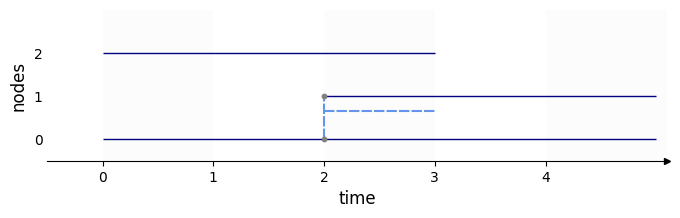

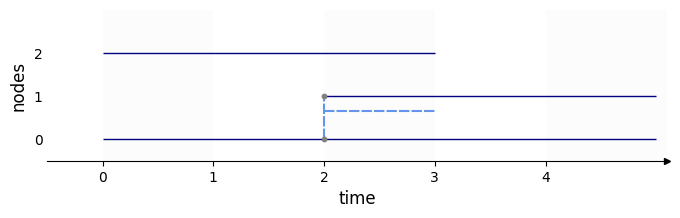

In [ ]:
plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence())

In [ ]:
gg.edge_presence()

{frozenset({0, 1}): [(2, 3)]}

(0, 1)
(0, 3)
(1, 3)
(0, 1)
(1, 3)


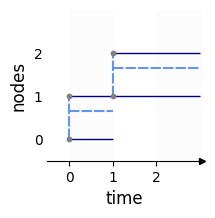

In [ ]:
gg = tn.DynGraphIG()
gg.add_node_presence(0,(0,1))
gg.add_node_presence(1,(0,3))
gg.add_node_presence(2,(1,3))
gg.add_interaction(0,1,(0,1))
gg.add_interaction(1,2,(1,3))
x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),width=200,height=200)

(0, 1)
(0, 3)
(0, 1)
(2, 3)
(0, 1)
(0, 1)
(2, 3)


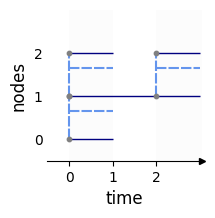

In [ ]:
gg = tn.DynGraphIG()
gg.add_node_presence(0,(0,1))
gg.add_node_presence(1,(0,3))
gg.add_node_presence(2,(0,1))
gg.add_node_presence(2,(2,3))

gg.add_interaction(0,1,(0,1))
gg.add_interaction(1,2,(0,1))
gg.add_interaction(1,2,(2,3))

x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),width=200,height=200)

(0, 1)
(2, 3)
(0, 1)
(2, 3)
(0, 1)
(2, 3)
(0, 1)
(0, 1)
(2, 3)


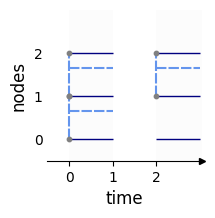

In [ ]:
gg = tn.DynGraphIG()
gg.add_node_presence(0,(0,1))
gg.add_node_presence(0,(2,3))
gg.add_node_presence(1,(0,1))
gg.add_node_presence(1,(2,3))
gg.add_node_presence(2,(0,1))
gg.add_node_presence(2,(2,3))

gg.add_interaction(0,1,(0,1))
gg.add_interaction(1,2,(0,1))
gg.add_interaction(1,2,(2,3))
#gg.add_interaction(0,1,(2,3))


x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),width=200,height=200)

(0, 7)
(0, 10)
(0, 10)
(2, 10)
(1, 6)
(2, 7)
(2.5, 4)
(7, 8)
(5, 6)
(4, 9)


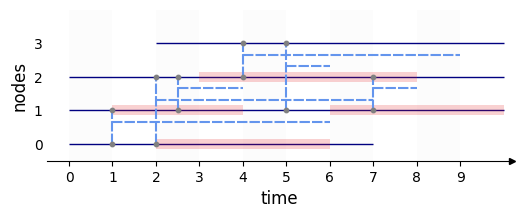

In [ ]:
gg = tn.DynGraphIG()
gg.add_node_presence(0,(0,7))
gg.add_node_presence(1,(0,10))
gg.add_node_presence(2,(0,10))
gg.add_node_presence(3,(2,10))

gg.add_interaction(0,1,(1,6))
gg.add_interaction(1,2,(2.5,4))
gg.add_interaction(1,2,(7,8))
gg.add_interaction(2,3,(4,9))
gg.add_interaction(0,2,(2,7))
gg.add_interaction(1,3,(5,6))

#gg.add_interaction(0,1,(2,3))




com1=tn.DynCommunitiesIG()
com1.add_affiliation(0,1,[(2,6)])
com1.add_affiliation(1,1,[(1,4)])
com1.add_affiliation(1,1,[(6,10)])
com1.add_affiliation(2,1,[(3,8)])

x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),com1.communities(),width=600,height=200,sparse_coms=True)


In [ ]:
def subnet(tg,cluster):
  to_return=tn.DynGraphIG()
  for n,p in tg.node_presence().items():
    if n in cluster:
      to_return.add_node_presence(n,p.intersection(cluster[n]))
  for e,p in tg.interactions_intervals().items():
    u,v=e
    if u in cluster and v in cluster:
      print(p)
      to_return.add_interaction(u,v,p.intersection(cluster[u]).intersection(cluster[v]))
  return to_return

In [ ]:
subtn = subnet(gg,com1.communities()[1])

[1,6[ 
[2,7[ 
[2.5,4[ [7,8[ 


(2, 6)
(1, 4)
(6, 10)
(3, 8)
(2, 4)
(3, 6)
(3, 4)
(7, 8)


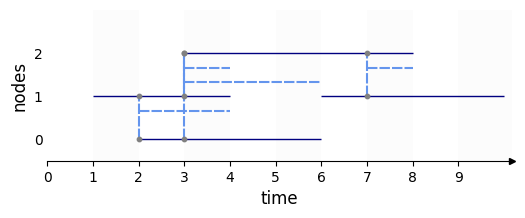

In [ ]:
x = plot_longitudinal_pyplot(subtn.edge_presence(),subtn.node_presence(),width=600,height=200,sparse_coms=True)


In [ ]:
com1.communities()[1]

{0: [2,6[ , 1: [1,4[ [6,10[ , 2: [3,8[ }

(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(1, 6)
(2, 5)
(3, 9)
(6, 9)
(5, 8)
(1, 3)
(7, 10)


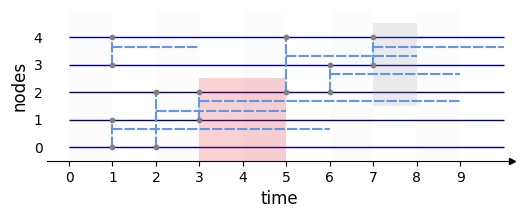

In [ ]:
gg = tn.DynGraphIG()
gg.add_node_presence(0,(0,10))
gg.add_node_presence(1,(0,10))
gg.add_node_presence(2,(0,10))
gg.add_node_presence(3,(0,10))
gg.add_node_presence(4,(0,10))


gg.add_interaction(0,1,(1,6))
gg.add_interaction(1,2,(3,9))
gg.add_interaction(0,2,(2,5))
gg.add_interaction(2,3,(6,9))
gg.add_interaction(3,4,(1,3))
gg.add_interaction(3,4,(7,10))
gg.add_interaction(2,4,(5,8))


#gg.add_interaction(0,1,(2,3))




com1=tn.DynCommunitiesIG()
com1.add_affiliation(0,1,[(3,5)])
com1.add_affiliation(1,1,[(3,5)])
com1.add_affiliation(2,1,[(3,5)])

com1.add_affiliation(2,2,[(7,8)])
com1.add_affiliation(3,2,[(7,8)])
com1.add_affiliation(4,2,[(7,8)])

x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),com1.communities(),width=600,height=200,sparse_coms=False)


# neighborhood

(0, 7)
(0, 10)
(0, 10)
(2, 10)
(1, 6)
(2, 7)
(2.5, 4)
(7, 8)
(5, 6)
(4, 9)


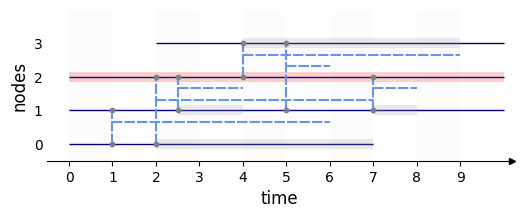

In [ ]:
gg = tn.DynGraphIG()
gg.add_node_presence(0,(0,7))
gg.add_node_presence(1,(0,10))
gg.add_node_presence(2,(0,10))
gg.add_node_presence(3,(2,10))

gg.add_interaction(0,1,(1,6))
gg.add_interaction(1,2,(2.5,4))
gg.add_interaction(1,2,(7,8))
gg.add_interaction(2,3,(4,9))
gg.add_interaction(0,2,(2,7))
gg.add_interaction(1,3,(5,6))

#gg.add_interaction(0,1,(2,3))




com1=tn.DynCommunitiesIG()
com1.add_affiliation(2,0,[(0,10)])
com1.add_affiliation(1,1,[(2.5,4)])
com1.add_affiliation(1,1,[(7,8)])

com1.add_affiliation(0,1,[(2,7)])
com1.add_affiliation(3,1,[(4,9)])

x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),com1.communities(),width=600,height=200,sparse_coms=True)


# Connected components

(0, 3)
(1, 6)
(0, 4)
(6, 10)
(0, 4)
(5, 8)
(2, 8)
(3, 5)
(1, 2)
(2, 4)
(2, 3)
(6, 7)
(5, 6)


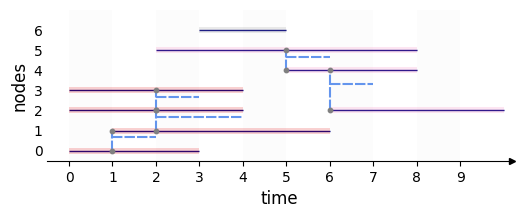

In [ ]:
gg = tn.DynGraphIG()
gg.add_node_presence(0,(0,3))
gg.add_node_presence(1,(1,6))
gg.add_node_presence(2,(0,4))
gg.add_node_presence(2,(6,10))
gg.add_node_presence(3,(0,4))
gg.add_node_presence(4,(5,8))
gg.add_node_presence(5,(2,8))
gg.add_node_presence(6,(3,5))



gg.add_interaction(0,1,(1,2))
gg.add_interaction(1,2,(2,4))
gg.add_interaction(2,3,(2,3))
gg.add_interaction(2,4,(6,7))
gg.add_interaction(5,4,(5,6))

# gg.add_interaction(0,2,(2,7))
# gg.add_interaction(1,3,(5,6))

#gg.add_interaction(0,1,(2,3))




com1=tn.DynCommunitiesIG()
com1.add_affiliation(0,0,[(0,3)])
com1.add_affiliation(1,0,[(1,6)])
com1.add_affiliation(2,0,[(0,4)])
com1.add_affiliation(3,0,[(0,4)])


com1.add_affiliation(5,5,[(2,8)])
com1.add_affiliation(4,5,[(5,8)])
com1.add_affiliation(2,5,[(6,10)])

com1.add_affiliation(6,6,[(3,5)])


x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),com1.communities(),width=600,height=200,sparse_coms=True)


# Paths

(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(2, 2)
(9, 9)
(8, 8)
(4, 4)
(10, 10)
(11, 11)
(7, 7)
(13, 13)


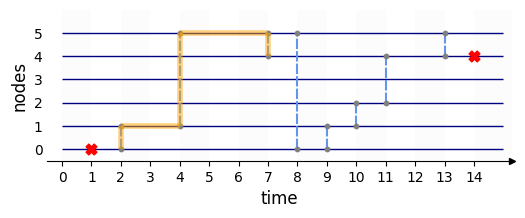

In [ ]:
gg = tn.DynGraphIG()
for i in range(6):
  gg.add_node_presence(i,(0,15))

gg.add_interaction(0,1,(2,2))
gg.add_interaction(1,5,(4,4))
gg.add_interaction(4,5,(7,7))
gg.add_interaction(0,5,(8,8))
gg.add_interaction(0,1,(9,9))
gg.add_interaction(1,2,(10,10))
gg.add_interaction(2,4,(11,11))
gg.add_interaction(4,5,(13,13))

#gg.add_interaction(0,1,(2,3))




x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),path=[(0,2),(1,2),(1,4),(5,4),(5,7),(4,7)],markers=[(0,1),(4,14)],width=600,height=200,sparse_coms=True)


(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(2, 2)
(9, 9)
(8, 8)
(4, 4)
(10, 10)
(11, 11)
(7, 7)
(13, 13)


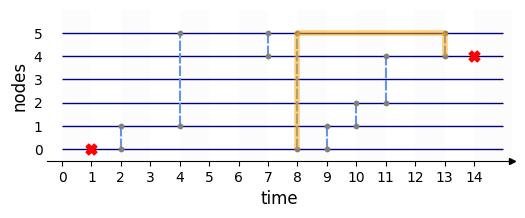

In [ ]:
gg = tn.DynGraphIG()
for i in range(6):
  gg.add_node_presence(i,(0,15))

gg.add_interaction(0,1,(2,2))
gg.add_interaction(1,5,(4,4))
gg.add_interaction(4,5,(7,7))
gg.add_interaction(0,5,(8,8))
gg.add_interaction(0,1,(9,9))
gg.add_interaction(1,2,(10,10))
gg.add_interaction(2,4,(11,11))
gg.add_interaction(4,5,(13,13))

#gg.add_interaction(0,1,(2,3))




x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),path=[(0,8),(5,8),(5,13),(4,13)],markers=[(0,1),(4,14)],width=600,height=200,sparse_coms=True)


(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(2, 2)
(9, 9)
(8, 8)
(4, 4)
(10, 10)
(11, 11)
(7, 7)
(13, 13)


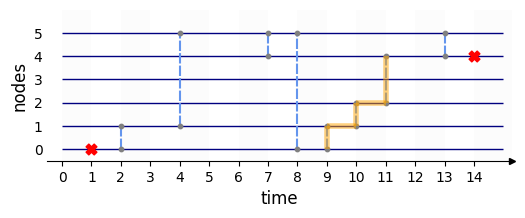

In [ ]:
gg = tn.DynGraphIG()
for i in range(6):
  gg.add_node_presence(i,(0,15))

gg.add_interaction(0,1,(2,2))
gg.add_interaction(1,5,(4,4))
gg.add_interaction(4,5,(7,7))
gg.add_interaction(0,5,(8,8))
gg.add_interaction(0,1,(9,9))
gg.add_interaction(1,2,(10,10))
gg.add_interaction(2,4,(11,11))
gg.add_interaction(4,5,(13,13))

#gg.add_interaction(0,1,(2,3))




x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),path=[(0,9),(1,9),(1,10),(2,10),(2,11),(4,11)],markers=[(0,1),(4,14)],width=600,height=200,sparse_coms=True)


(0, 7)
(0, 10)
(0, 10)
(2, 10)
(1, 6)
(2, 7)
(2.5, 4)
(7, 8)
(5, 6)
(4, 9)


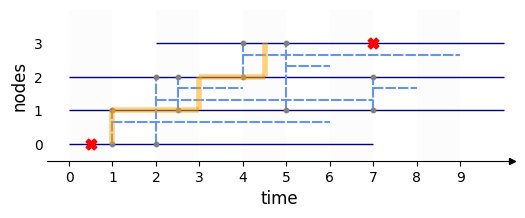

In [ ]:
gg = tn.DynGraphIG()
gg.add_node_presence(0,(0,7))
gg.add_node_presence(1,(0,10))
gg.add_node_presence(2,(0,10))
gg.add_node_presence(3,(2,10))

gg.add_interaction(0,1,(1,6))
gg.add_interaction(1,2,(2.5,4))
gg.add_interaction(1,2,(7,8))
gg.add_interaction(2,3,(4,9))
gg.add_interaction(0,2,(2,7))
gg.add_interaction(1,3,(5,6))

#gg.add_interaction(0,1,(2,3))





x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),path=[(0,1),(1,1),(1,3),(2,3),(2,4.5),(3,4.5)],markers=[(0,0.5),(3,7)],width=600,height=200,sparse_coms=True)


(0, 7)
(0, 10)
(0, 10)
(2, 10)
(1, 6)
(2, 7)
(2.5, 4)
(7, 8)
(5, 6)
(4, 9)


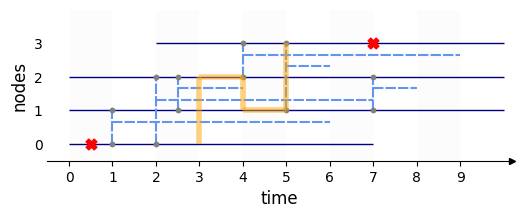

In [ ]:
gg = tn.DynGraphIG()
gg.add_node_presence(0,(0,7))
gg.add_node_presence(1,(0,10))
gg.add_node_presence(2,(0,10))
gg.add_node_presence(3,(2,10))

gg.add_interaction(0,1,(1,6))
gg.add_interaction(1,2,(2.5,4))
gg.add_interaction(1,2,(7,8))
gg.add_interaction(2,3,(4,9))
gg.add_interaction(0,2,(2,7))
gg.add_interaction(1,3,(5,6))

#gg.add_interaction(0,1,(2,3))





x = plot_longitudinal_pyplot(gg.edge_presence(),gg.node_presence(),path=[(0,3),(2,3),(2,4),(1,4),(1,5),(3,5)],markers=[(0,0.5),(3,7)],width=600,height=200,sparse_coms=True)
